In [1]:
import numpy as np
from scipy.special import erf
from f_pq import * # constante de normalización e integral de traslape

In [2]:
vdecimal = 6 # precisión decimal
# los valores se redondearán a un orden de magnitud previo del primer dígito diferente de cero para la condición de normalización.

La base de funciones a considerar es
$$ \chi_1 = \psi_+ \alpha \,, \quad
\chi_2 = \psi_+ \beta \,, \quad
\chi_3 = \psi_- \alpha \,, \quad
\chi_4 = \psi_- \beta \,,
$$

donde $\psi_\pm = c_\pm (\varphi_A \pm \varphi_B)$ con

$$ c_\pm = \frac{1}{\sqrt{2 (1 \pm S)}}\,, $$

la constante de normalización y

$$ \varphi_C := R_{nl}^{k}(\zeta, \vec{d}, \vec{\alpha}, r_C) Y_{lm}(\theta,\phi) \,,$$

las funciones espaciales. En esto último $R_{nl}^{k}$ se trata de una combinación lineal de $k$ funciones Gaussianas o como también es conocido, una $k$-contracción de gaussianas:

$$ R_{nl}^{k}(\zeta, \vec{d}, \vec{\alpha}, r) = \sum_{i=1}^{k} d_i R_{l}^{\mathrm{GTO}} (\zeta^2 \alpha_i, r) \,;
\qquad \qquad
R_l^{\mathrm{GTO}} (\alpha, r) = \frac{2(2\alpha)^{3/4}}{\pi^{1/4}} \sqrt{\frac{2^l}{(2l+1)!!}} (\sqrt{2\alpha}r)^l \exp(-\alpha r^2) \,.
$$

Los elementos de matriz por calcular son de la forma

$$ g_{pqrs} = \int \frac{\chi_p^* (\mathbf{x}_1) \chi_q^* (\mathbf{x}_2) \chi_r (\mathbf{x}_1) \chi_s (\mathbf{x}_2)}{r_{12}} \mathrm{d}\vec{\mathbf{x}}_1 \, \mathrm{d}\vec{\mathbf{x}}_2 $$

Sustituyendo a las funciones base se sigue

$$\begin{align}
g_{pqrs}
    &= \int \frac{\psi_{\pm_p}^* (\mathbf{r}_1)
        \psi_{\pm_q}^* (\mathbf{r}_2)
        \psi_{\pm_r} (\mathbf{r}_1)
        \psi_{\pm_s} (\mathbf{r}_1)}{r_{12}}
        \mathrm{d}V_1 \, \mathrm{d}V_2
    \int \sigma_p^* (\omega_1) \sigma_r (\omega_1) \mathrm{d}\omega_1
    \int \sigma_q^* (\omega_2) \sigma_s (\omega_2) \mathrm{d}\omega_2
\end{align}
$$

Note que las integrales sobre las coordenadas de espín serán diferentes de 0 sí y solo sí $p$ y $r$ ($q$ y $s$) son simultáneamente par o impar, i.e. (2,4) o (1,3).

Desarrollamos para los términos iniciales de la forma $\psi_{\pm_p}^* (\mathbf{r}_1) \psi_{\pm_q}^* (\mathbf{r}_2) \psi_{\pm_r} (\mathbf{r}_1) \psi_{\pm_s} (\mathbf{r}_1)$:

$$\psi_{\pm_p}^* (\mathbf{r}_1) \psi_{\pm_q}^* (\mathbf{r}_2) \psi_{\pm_r} (\mathbf{r}_1) \psi_{\pm_s} (\mathbf{r}_1)
    = c_{\pm_p} c_{\pm_q} c_{\pm_r} c_{\pm_s} [\varphi_A (\mathbf{r}_1) \pm_p \varphi_B (\mathbf{r}_1)]^* [\varphi_A (\mathbf{r}_2) \pm_q \varphi_B (\mathbf{r}_2)]^* [\varphi_A (\mathbf{r}_1) \pm_r \varphi_B (\mathbf{r}_1)] [\varphi_A (\mathbf{r}_2) \pm_s \varphi_B (\mathbf{r}_2)]
$$

Multiplicando todos los factores del lado derecho de la igualdad se obtienen un total de 16 términos. Considere el código siguiente donde se imprime la forma de cada uno de los términos junto con el signo del mismo.

In [3]:
nuc = ['A', 'B']

term = 1
for p in nuc:
    for q in nuc:
        for r in nuc:
            for s in nuc:
                sign = ''
                if p == 'B':
                    sign += 'p'
                if q == 'B':
                    sign += 'q'
                if r == 'B':
                    sign += 'r'
                if s == 'B':
                    sign += 's'
                print(term, '-', p, q, r, s, '-' , sign,)
                term += 1

# Aquí p, q, s, r representan el signo de p, q, r ,s. Entonces, por ejemplo el término prs, no es más que el producto de los signos de p, r, s.

1 - A A A A - 
2 - A A A B - s
3 - A A B A - r
4 - A A B B - rs
5 - A B A A - q
6 - A B A B - qs
7 - A B B A - qr
8 - A B B B - qrs
9 - B A A A - p
10 - B A A B - ps
11 - B A B A - pr
12 - B A B B - prs
13 - B B A A - pq
14 - B B A B - pqs
15 - B B B A - pqr
16 - B B B B - pqrs


En general se tendrá un subtérmino de la forma

$$ \varphi_A^* (\mathbf{r}_1) \varphi_B^* (\mathbf{r}_2) \varphi_C (\mathbf{r}_1) \varphi_D (\mathbf{r}_2)
= G_{\mu}^* (\vec{r}_1, \vec{\alpha}, \vec{A}) G_{\nu}^* (\vec{r}_2, \vec{\beta}, \vec{B}) G_{\lambda} (\vec{r}_1, \vec{\gamma}, \vec{C}) G_{\sigma} (\vec{r}_2, \vec{\delta}, \vec{D})
$$

donde

$$ G_{\mu} (\vec{r}, \vec{\alpha}, \vec{A}) = \sum_{i = 1}^{k} d_{i \mu} G (\vec{r}, \alpha_{i \mu}, \vec{A}) $$

De lo cual es posible notar que la cantidad de subsubtérminos para un subtérmino arbitrario $\varphi_A (\mathbf{r}_1) \varphi_B (\mathbf{r}_2) \varphi_C (\mathbf{r}_1) \varphi_D (\mathbf{r}_2)$ son $k^4$. En nuestro caso $k=3$, i.e. un total de $3^4$ subsubtérminos.

Más explícitamente un subtérmino lucirá de la siguiente forma:

$$ \begin{align}
    \varphi_A^* (\mathbf{r}_1) \varphi_B^* (\mathbf{r}_2) \varphi_C (\mathbf{r}_1) \varphi_D (\mathbf{r}_2)
    &= \sum_{i = 1}^{3} d_{i \mu}^* G^* (\vec{r}_1, \alpha_{i \mu}, \vec{A}) \sum_{j = 1}^{3} d_{j \nu}^* G^* (\vec{r}_2, \beta_{j \nu}, \vec{B})
        \sum_{k = 1}^{3} d_{k \lambda} G (\vec{r}_1, \gamma_{k \lambda}, \vec{C}) \sum_{l = 1}^{3} d_{l \sigma} G (\vec{r}_2, \delta_{l \sigma}, \vec{D}) \\
    &= \sum_{i = 1}^{3} \sum_{j = 1}^{3} \sum_{k = 1}^{3} \sum_{l = 1}^{3} d_{i \mu}^* \, d_{j \nu}^* \, d_{k \lambda} \, d_{l \sigma} \,
        G^* (\vec{r}_1, \alpha_{i \mu}, \vec{A}) \, G^* (\vec{r}_2, \beta_{j \nu}, \vec{B}) \,
        G (\vec{r}_1, \gamma_{k \lambda}, \vec{C}) \,  G (\vec{r}_2, \delta_{l \sigma}, \vec{D})
\end{align}
$$

Introduciendo a la integral original se sigue que

$$ \begin{align}
\int & \mathrm{d}V_1 \, \mathrm{d}V_2 \frac{1}{r_{12}}
\sum_{i = 1}^{3} \sum_{j = 1}^{3} \sum_{k = 1}^{3} \sum_{l = 1}^{3} d_{i \mu}^* \, d_{j \nu}^* \, d_{k \lambda} \, d_{l \sigma} \,
        G^* (\vec{r}_1, \alpha_{i \mu}, \vec{A}) \, G^* (\vec{r}_2, \beta_{j \nu}, \vec{B}) \,
        G (\vec{r}_1, \gamma_{k \lambda}, \vec{C}) \,  G (\vec{r}_2, \delta_{l \sigma}, \vec{D}) = \\
&= \sum_{i = 1}^{3} \sum_{j = 1}^{3} \sum_{k = 1}^{3} \sum_{l = 1}^{3} d_{i \mu}^* \, d_{j \nu}^* \, d_{k \lambda} \, d_{l \sigma} \,
        \int \frac{1}{r_{12}}
        G^* (\vec{r}_1, \alpha_{i \mu}, \vec{A}) \, G^* (\vec{r}_2, \beta_{j \nu}, \vec{B}) \,
        G (\vec{r}_1, \gamma_{k \lambda}, \vec{C}) \,  G (\vec{r}_2, \delta_{l \sigma}, \vec{D}) \,
        \mathrm{d}V_1 \, \mathrm{d}V_2 \\
&= \sum_{i = 1}^{3} \sum_{j = 1}^{3} \sum_{k = 1}^{3} \sum_{l = 1}^{3} d_{i \mu}^* \, d_{j \nu}^* \, d_{k \lambda} \, d_{l \sigma} \,
        \mathcal{V}_{ijkl}^{(12)}
\end{align}
$$

Desarrollando para la integral $\mathcal{V}_{12}$ se sigue

$$\begin{align}
    \mathcal{V}_{ijkl}^{(12)}
    & = \int \frac{1}{r_{12}}
        G^* (\vec{r}_1, \alpha_{i \mu}, \vec{A}) \, G^* (\vec{r}_2, \beta_{j \nu}, \vec{B}) \,
        G (\vec{r}_1, \gamma_{k \lambda}, \vec{C}) \,  G (\vec{r}_2, \delta_{l \sigma}, \vec{D}) \,
        \mathrm{d}V_1 \, \mathrm{d}V_2 \\
    & = \left( \frac{2\alpha_{i \mu}}{\pi} \right)^{3/4} \left( \frac{2\beta_{j \nu}}{\pi} \right)^{3/4}
        \left( \frac{2\gamma_{k \lambda}}{\pi} \right)^{3/4} \left( \frac{2\delta_{l \sigma}}{\pi} \right)^{3/4}
        \underbrace{\int \frac{1}{r_{12}}
        \exp(-\alpha_{i \mu} r^2_{1A}) \, \exp(-\beta_{j \nu} r^2_{2B}) \,
        \exp(-\gamma_{k \lambda} r^2_{1C}) \, \exp(-\delta_{l \sigma} r^2_{2D}) \, \mathrm{d}V_1 \, \mathrm{d}V_2}_{(AB | CD)}
\end{align}
$$

In [4]:
def GaussNorm(a : int):
    """ Factor de normalización Gaussiano 1s
    
    a : exponente Gaussiano
    """
    return np.power(2*a/np.pi, 3/4)

La integral $(AB|CD)$ de acuerdo con Szabo y Ostlund [1, p.416] es:

$$ \begin{align}
    (AB|CD)
        = \frac{2 \pi^{5/2}}{(\alpha + \beta)(\gamma + \delta)(\alpha + \beta + \gamma + \delta)^{1/2}} \,
        \exp\left[ -\frac{\alpha \, \beta}{\alpha + \beta} |\mathbf{R}_A-\mathbf{R}_B|^2 -\frac{\gamma \, \delta}{\gamma + \delta} |\mathbf{R}_C-\mathbf{R}_D|^2 \right]
        F_0 \left[ \frac{(\alpha + \beta)(\gamma + \delta)}{\alpha + \beta + \gamma + \delta} |\mathbf{R}_P-\mathbf{R}_Q|^2 \right]
\end{align}$$

donde $F_0(t)$ es

$$ F_0(t) = \frac{1}{2} \left( \frac{\pi}{t} \right)^{1/2} \mathrm{erf}(t^{1/2}) \,;
\quad
\text{con} \quad \mathrm{erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^{z} e^{-t^2} \, \mathrm{d}t
$$

y $\mathbf{R}_P$, $\mathbf{R}_Q$ son

$$ \mathbf{R}_P = \frac{\alpha \mathbf{R}_A + \beta \, \mathbf{R}_B}{\alpha + \beta} \,,
\quad
\mathbf{R}_Q = \frac{\gamma \mathbf{R}_C + \delta \, \mathbf{R}_D}{\gamma + \delta} \,.$$

In [5]:
def F0(t : float):
    """ Función de Boys, n=0
    
    t : argumento de la función
    """
    return (1/2) * np.sqrt(np.pi/t) * erf(np.sqrt(t))

<div class="alert alert-block alert-warning">
<strong>Observación.</strong> Para Szabo y Ostlund las Gaussianas centradas en $A$, $B$ están asociadas al electrón 1, mientras que las centradas en $C$ y $D$ están asociadas al electrón 2. En nuestro caso $A$, $C$ están asociadas al electrón 1, mientras que $B$ y $D$ al electrón 2.

Por esto último, es necesario considerar las equivalencias siguientes:
- A -> A , $\alpha$ -> $\alpha$
- B -> C , $\beta$ -> $\gamma$
- C -> B , $\gamma$ -> $\beta$
- D -> D , $\delta$ -> $\delta$
</div>

In [6]:
def arg(a : float, b : float, RA : np.array, RB : np.array):
    """ Argumento del factor pre-exponencial K
    
    (a, b) : exponente orbital Gaussiano
    (RA, RB) : coordenada del núcleo (A, B)
    """
    p = a+b # exponente total
    mu = a*b/p
    RAB2 = np.square(np.linalg.norm(RA-RB))
    return -mu*RAB2

In [7]:
def K(a : float, b : float, c : float, d : float, RA : np.array, RB : np.array, RC : np.array, RD : np.array):
    """ Factor pre-exponencial
    
    (a, b, c, d) : exponente orbital Gaussiano
    (RA, RB, RC, RD) : coordenada del núcleo (A, B, C, D)
    """
    return np.exp(arg(a, c, RA, RC) + arg(b, d, RB, RD))

En nuestra notación se tiene entonces que

$$ \begin{align}
    (AC|BD)
        = \frac{2 \pi^{5/2}}{(\alpha + \gamma)(\beta + \delta)(\alpha + \beta + \gamma + \delta)^{1/2}} \,
        \exp\left[ -\frac{\alpha \, \delta}{\alpha + \delta} |\mathbf{R}_A-\mathbf{R}_C|^2 -\frac{\beta \, \delta}{\beta + \delta} |\mathbf{R}_B-\mathbf{R}_D|^2 \right]
        F_0 \left[ \frac{(\alpha + \gamma)(\beta + \delta)}{\alpha + \beta + \gamma + \delta} |\mathbf{R}_P-\mathbf{R}_Q|^2 \right]
\end{align}
$$

donde $\mathbf{R}_P$, $\mathbf{R}_Q$ serían

$$ \mathbf{R}_P = \frac{\alpha \mathbf{R}_A + \gamma \, \mathbf{R}_C}{\alpha + \gamma} \,,
\quad
\mathbf{R}_Q = \frac{\beta \, \mathbf{R}_B + \delta \, \mathbf{R}_D}{\beta + \delta} \,.$$

Observe que $(AC|BD) = (AD|BC) = (CA|DB)$, lo cual implica que de las 16 integrales iniciales por calcular solo hay 4 valores únicos.

In [8]:
def RP(a : float, b : float, RA : np.array, RB : np.array):
    """ Coordenada de centro de carga
    
    (a, b) : exponente orbital Gaussiano
    (RA, RB) : coordenada del núcleo (A, B)
    """
    p = a + b # exponente total
    return (a*RA+b*RB)/p

La integral $(AC|BD)$ considera todos las posibles combinaciones de núcleos $A$, $B$, $C$, $D$ dado que el sistema solo tiene dos núcleos, a excepción de un caso. Cuando todos los núcleos son iguales, i.e. $A = B = C = D$, la expresión diverge puesto que $\mathbf{R}_P = \mathbf{R}_Q = \mathbf{R}_A$. En cuyo caso, la expresión a considerar se puede deducir a partir de la igualdad (A.40) en [1, 416]:

$$ (AA|AA)
    = \frac{M}{2\pi^2} \left( \frac{\pi^2}{pq} \right)^{3/2} \int k^{-2} \exp\left[-\frac{(p+q)}{4pq} k^2 \right]
        \exp\left[i \mathbf{k} \cdot (\mathbf{R}_P - \mathbf{R}_Q) \right] \, \mathrm{d}\vec{\mathbf{k}}
$$

donde $p = \alpha + \gamma$, $q = \beta + \delta$. No obstante, como $A = B = C = D$, entonces $M = 1$ y $\mathbf{R}_P - \mathbf{R}_Q = 0$. De lo cual, la integral en cuestión se reduce a

$$\begin{align}
    (AA|AA)
    &= \frac{1}{2\pi^2} \left( \frac{\pi^2}{pq} \right)^{3/2} \int k^{-2} \exp\left[-\frac{p+q}{4pq} k^2 \right] \mathrm{d}\vec{\mathbf{k}} \\
    &= \frac{1}{2} \frac{\pi}{(pq)^{3/2}} (4\pi) \int_0^\infty \exp\left[-\frac{p+q}{4pq} k^2 \right] \mathrm{d}k \\
    &= \frac{2\pi^2}{(pq)^{3/2}} \frac{\pi^{1/2}}{2} \left( \frac{4pq}{p+q} \right)^{1/2} \\
    &= \frac{2 \pi^{5/2}}{pq} \left( \frac{1}{p+q} \right)^{1/2} \\
    &= \frac{2 \pi^{5/2}}{(\alpha + \gamma) (\beta + \delta) (\alpha + \beta + \gamma + \delta)^{1/2}}
\end{align}$$

In [9]:
def ACBD(a : float, b : float, c : float, d : float, RA : np.array, RB : np.array, RC : np.array, RD : np.array):
    """ Integral de dos electrones (AC|BD)
    
    (a, b, c, d) : exponentes orbitales Gaussianos
    (RA, RB, RC, RD) : coordenadas del núcleo (A, B, C, D)

        A, C : asociados al electrón 1
        B, D : asociados al electrón 2
    """

    factor = 2*np.power(np.pi, 5/2)/((a+c)*(b+d)*np.sqrt(a+b+c+d))

    if np.array_equal(RA, RB) and np.array_equal(RB, RC) and np.array_equal(RC, RD):
        return factor
    else:
        Rp = RP(a, c, RA, RC)
        Rq = RP(b, d, RB, RD)
        RPQ2 = np.square(np.linalg.norm(Rp-Rq))
    
        if (np.array_equal(RA, RB) and np.array_equal(RC, RD)) and ( (a==b and c==d) or (a==c and b==d) or (a==d and c==b) ):
            term = factor * K(a, b, c, d, RA, RB, RC, RD)
            
        elif (np.array_equal(RA, RD) and np.array_equal(RB, RC)) and ( (a==b and c==d) or (a==c and b==d) or (a==d and c==b) ):
            term = factor * K(a, b, c, d, RA, RB, RC, RD)

        elif (np.array_equal(RA, RC) and np.array_equal(RB, RD)) and ( (a==b and c==d) or (a==c and b==d) or (a==d and c==b) ):
            term = factor * F0((a+c)*(b+d)/(a+b+c+d)*RPQ2)
            
        else:
            term = factor * K(a, b, c, d, RA, RB, RC, RD) * F0((a+c)*(b+d)/(a+b+c+d)*RPQ2)

        return term

In [10]:
def V12(a : float, b : float, c : float, d : float, RA : np.array, RB : np.array, RC : np.array, RD : np.array):
    """ Integral de dos electrones total (normalizada)
        
    (a, b, c, d) : exponentes orbitales Gaussianos
    (RA, RB, RC, RD) : coordenadas del núcleo (A, B, C, D)

        A, C : asociados al electrón 1
        B, D : asociados al electrón 2
    """
    v12 = GaussNorm(a) * GaussNorm(b) * GaussNorm(c) * GaussNorm(d) * ACBD(a, b, c, d, RA, RB, RC, RD)
    return v12

In [11]:
def Vmn(d : np.array, a : np.array, RA : np.array, RB : np.array, RC : np.array, RD : np.array):
    """ Elemento de matriz de interacción de dos electrones

    d : vector de coeficientes de expansión (d1, d2, ..., dk)
    a : vector de exponentes orbitales Gaussianos (a1, a2, ..., ak)
    (RA, RB, RC, RD) : coordenada del núcleo (A, B, C, D)
    """
    Mijkl = 0 # elemento de tensor
    L = len(d)
    for i in range(L):
        for j in range(L):
            for k in range(L):
                for l in range(L):
                    Mijkl += d[i] * d[j] * d[k] * d[l] * V12(a[i], a[j], a[k], a[l], RA, RB, RC, RD)
    
    return Mijkl

<div class="alert alert-block alert-warning">
<strong>Revisión de control.</strong>
</div>

In [14]:
d = np.array([0.44471812476789035, 0.5352716544572346, 0.1543000507808527])
a = np.array([0.16887939463273338, 0.6240343336327064, 3.4256944279866635])

# distancia interatómica de 1.401 u.a.
RA = np.array([0, 0, 0])
RB = np.array([1.401, 0, 0])

# valores calculados
AA_AA = Vmn(d, a, RA, RA, RA, RA)
AB_AB = Vmn(d, a, RA, RB, RA, RB)
AA_AB = Vmn(d, a, RA, RA, RA, RB)
AA_BB = Vmn(d, a, RA, RA, RB, RB)

print(AA_AA, AB_AB, AA_AB, AA_BB)

0.7746132090951571 0.5694796377720256 0.4438060734237675 0.2994412111404783


A continuación una tabla comparativa de las integrales de dos electrones entre los valores obtenidos (Segura) y los de la literatura (Szabo).

|  Integral  |  $(AA|AA)$ |  $(AB|AB)$ |  $(AA|AB)$ | $(AA|BB)$ |
|:-----------|:----------:|:----------:|:----------:|:----------:|
|   Segura   | 0.7746132090951571 | 0.5694796377720256  | 0.4438060734237675  | 0.2994412111404783  |
|   Szabo    | 0.7746   | 0.5697   | 0.4441   | 0.2970   |

Como aclaración, Szabo reporta los valores precios con los subíndices 1 y 2, estos corresponden (en ese mismo orden) a los núcleos $A$ y $B$. Además, para Szabo la integral $(AB|CD)$ es de tal forma que los núcleos $(A,B)$ están asociados al electrón 1 y $(C,D)$ están asociados al electrón 2. En nuestro caso los núcleos $(A,C)$ están asociados al electrón 1 y $(B,D)$ están asociados al electrón 2.

<div class="alert alert-block alert-info">
<strong>Coeficiente de normalización $c_{\pm}$</strong>
</div>

In [15]:
def cPM(d: np.array, a: np.array, RA: np.array, RB: np.array, signo : int):
    """
        Constante de normalización c+-
            Psi = c+- (Phi_A +- Phi_B)
            
    d : vector de coeficientes de expansión (d1, d2, ..., dk)
    a : vector de exponentes orbitales Gaussianos (a1, a2, ..., ak)
    (RA, RB) : coordenada del núcleo (A, B)
    signo : signo de la normalización
         1 -> positivo
        -1 -> negativo
    """
    S = np.round(Smn(d, a, RA, RB), vdecimal)
    if signo == 1: # positivo
        return 1/np.sqrt(2*(1+S))
    else: # negativo
        return 1/np.sqrt(2*(1-S))

<div class="alert alert-block alert-info">
<strong>Elemento de matriz $g_{pqrs}$</strong>
</div>

In [229]:
def gpqrs(P : np.array, d : np.array, a : np.array, RA : np.array, RB : np.array):
    """ Elemento de matriz g_pqrs
    
    P : vector de elementos de la base, P = (p,q,r,s)
    d : vector de coeficientes de expansión (d1, d2, ..., dk)
    a : vector de exponentes orbitales Gaussianos (a1, a2, ..., ak)
    (RA, RB) : coordenada del núcleo (A, B)
    """
    p,q,r,s = P
    nucleos = [RA, RB]

    Mpqrs = 0 # elemento de tensor

    # si ocurre que (p,r) o (q,s) no son simultáneamente par o impar, g_pqrs = 0 (debido al espín)
    if ((p in [1,3] and r not in [1,3]) or (p in [2,4] and r not in [2,4])) or ((q in [1,3] and s not in [1,3]) or (q in [2,4] and s not in [2,4])):
        Mpqrs = 0 # elemento de tensor
    else:        
        sgn_p = 1 if p in [1,2] else -1 # signo de p
        sgn_q = 1 if q in [1,2] else -1 # signo de q
        sgn_r = 1 if r in [1,2] else -1 # signo de r
        sgn_s = 1 if s in [1,2] else -1 # signo de s
    
        # coeficientes de normalización (p,q,r,s)
        cp = cPM(d, a, RA, RB, sgn_p)
        cq = cPM(d, a, RA, RB, sgn_q)
        cr = cPM(d, a, RA, RB, sgn_r)
        cs = cPM(d, a, RA, RB, sgn_s)
        
        for A in nucleos:
            for B in nucleos:
                for C in nucleos:
                    for D in nucleos:
                        sign = 1
                        if np.array_equal(A, RB):
                            sign *= sgn_p
                        if np.array_equal(B, RB):
                            sign *= sgn_q
                        if np.array_equal(C, RB):
                            sign *= sgn_r
                        if np.array_equal(D, RB):
                            sign *= sgn_s

                        mpqrs = sign*Vmn(d, a, A, B, C, D)
                        Mpqrs += mpqrs
    
        Mpqrs = cp*cq*cr*cs*Mpqrs # multiplicar Mpqrs por coefs. de normalización
        
    return Mpqrs

In [230]:
P = [1,2,1,2]
gpqrs(P, d, a, RA, RB)

np.float64(0.6755020664086598)

In [231]:
P = [3,4,3,4]
gpqrs(P, d, a, RA, RB)

np.float64(0.7211818604511658)

In [232]:
P = [1,3,1,3]
gpqrs(P, d, a, RA, RB)

np.float64(0.6585909899330212)

In [233]:
P = [3,2,1,4]
gpqrs(P, d, a, RA, RB)

np.float64(0.18128989792542163)

A continuación una tabla comparativa de las integrales de dos electrones entre los valores obtenidos (Segura) y los de la literatura (Szabo).

|  Integral  |  $J_{11}$ |  $J_{12}$ |  $J_{22}$ | $K_{12}$ |
|:-----------|:----------:|:----------:|:----------:|:----------:|
|   Segura   | 0.6755020664086598 | 0.7211818604511658  | 0.6585909899330212 | 0.18128989792542163 |
|   Szabo    | 0.6746   | 0.6636   | 0.6975   | 0.1813   |

Los valores obtenidos coinciden con la suma hecha a mano. Por lo cual, la diferencia entre estos valores con los de la literatura se deben al error numérico acumulado.

In [246]:
elementos = set()
terminos = dict()

for p in range(1,5):
    for q in range(1,5):
        for r in range(1,5):
            for s in range(1,5):
                # la acción de los 4 operadores escalera asociados a g_iiii es 0, por lo tanto se omiten dichos elementos
                if p == q and q == r and r == s:
                    continue
                # la acción de los 4 operadores escalera asociados a g_iijj es 0, por lo tanto se omiten dichos elementos
                elif ((p == 1 and q == 1) and (r == 3 and s == 3)) or ((p == 3 and q == 3) and (r == 1 and s == 1)) \
                    or ((p == 2 and q == 2) and (r == 4 and s == 4)) or ((p == 4 and q == 4) and (r == 2 and s == 2)):
                    continue
                else:
                    elemento = float(np.round(gpqrs([p,q,r,s], d, a, RA, RB),vdecimal))
                    if elemento == 0:
                        continue
                    else:
                        if elemento in elementos:
                            terminos[f'{elemento}'].append(f'{p}{q}{r}{s}')
                        else:
                            elementos.add(elemento)
                            terminos[f'{elemento}'] = [f'{p}{q}{r}{s}']

In [247]:
for elemento in elementos:
    print(elemento, ":", terminos[f'{elemento}'])

0.675502 : ['1212', '2121']
0.658591 : ['1313', '1414', '2323', '2424', '3131', '3232', '4141', '4242']
0.721182 : ['3434', '4343']
0.18129 : ['1234', '1331', '1432', '2143', '2341', '2442', '3113', '3214', '3412', '4123', '4224', '4321']


In [166]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [194]:
def gpqrs(P : np.array, d : np.array, a : np.array, RA : np.array, RB : np.array):
    """ Elemento de matriz g_pqrs
    
    P : vector de elementos de la base, P = (p,q,r,s)
    d : vector de coeficientes de expansión (d1, d2, ..., dk)
    a : vector de exponentes orbitales Gaussianos (a1, a2, ..., ak)
    (RA, RB) : coordenada del núcleo (A, B)
    """
    p,q,r,s = P
    nucleos = [RA, RB]

    Mpqrs = 0 # elemento de tensor

    sgn_p = 1 if p in [1,2] else -1 # signo de p
    sgn_q = 1 if q in [1,2] else -1 # signo de q
    sgn_r = 1 if r in [1,2] else -1 # signo de r
    sgn_s = 1 if s in [1,2] else -1 # signo de s

    # coeficientes de normalización (p,q,r,s)
    cp = cPM(d, a, RA, RB, sgn_p)
    cq = cPM(d, a, RA, RB, sgn_q)
    cr = cPM(d, a, RA, RB, sgn_r)
    cs = cPM(d, a, RA, RB, sgn_s)
    
    for A in nucleos:
        for B in nucleos:
            for C in nucleos:
                for D in nucleos:
                    sign = 1
                    if np.array_equal(A, RB):
                        sign *= sgn_p
                    if np.array_equal(B, RB):
                        sign *= sgn_q
                    if np.array_equal(C, RB):
                        sign *= sgn_r
                    if np.array_equal(D, RB):
                        sign *= sgn_s

                    mpqrs = sign*Vmn(d, a, A, B, C, D)
                    Mpqrs += mpqrs
    
    Mpqrs = cp*cq*cr*cs*Mpqrs # multiplicar Mpqrs por coefs. de normalización
        
    return Mpqrs

In [234]:
elementos = set()
terminos = dict()

for p in range(1,5):
    for q in range(1,5):
        for r in range(1,5):
            for s in range(1,5):
                elemento = float(np.round(gpqrs([p,q,r,s], d, a, RA, RB),vdecimal))
                if elemento == 0:
                    continue
                else:
                    if elemento in elementos:
                        terminos[f'{elemento}'].append(f'{p}{q}{r}{s}')
                    else:
                        elementos.add(elemento)
                        terminos[f'{elemento}'] = [f'{p}{q}{r}{s}']

In [248]:
n = 4
matriz = []

for i in range(n):
    matriz.append([])
    for j in range(n):
        matriz[i].append(np.zeros(shape=(n,n)))

factor = 100

for elemento in elementos:
    for termino in terminos[f'{elemento}']:
        p, q, r, s = int(termino[0])-1, int(termino[1])-1, int(termino[2])-1, int(termino[3])-1
        # print(p,q,r,s)
        if elemento == 0.18129:
            matriz[s][r][q][p] = 1*factor
        if elemento == 0.658591:
            matriz[s][r][q][p] = 2*factor
        if elemento == 0.675502:
            matriz[s][r][q][p] = 3*factor
        if elemento == 0.721182:
            matriz[s][r][q][p] = 4*factor

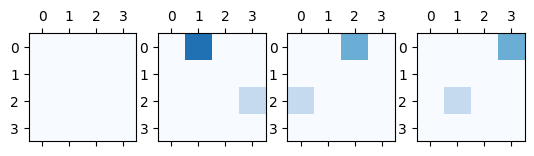

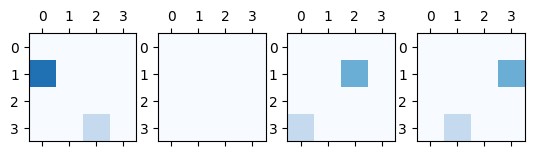

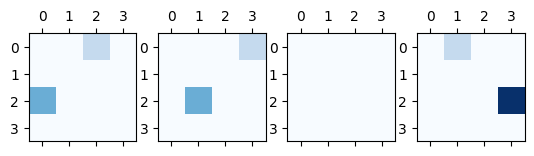

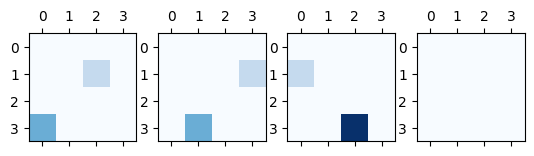

In [249]:
vmax = n*factor

for p in range(n):
    m1 = matriz[p][0]
    m2 = matriz[p][1]
    m3 = matriz[p][2]
    m4 = matriz[p][3]

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, n)

    ax1.matshow(m1, cmap=plt.cm.Blues, vmin=0, vmax=vmax)
    ax2.matshow(m2, cmap=plt.cm.Blues, vmin=0, vmax=vmax)
    ax3.matshow(m3, cmap=plt.cm.Blues, vmin=0, vmax=vmax)
    ax4.matshow(m4, cmap=plt.cm.Blues, vmin=0, vmax=vmax)

    # for i in range(n):
    #     for j in range(n):
    #         c = m1[j,i]
    #         if c != 0:
    #             ax1.text(i, j, str(c/factor), va='center', ha='center')
    
    # for i in range(n):
    #     for j in range(n):
    #         c = m2[j,i]
    #         if c != 0:
    #             ax2.text(i, j, str(c/factor), va='center', ha='center')
    
    # for i in range(n):
    #     for j in range(n):
    #         c = m3[j,i]
    #         if c != 0:
    #             ax3.text(i, j, str(c/factor), va='center', ha='center')
    
    # for i in range(n):
    #     for j in range(n):
    #         c = m4[j,i]
    #         if c != 0:
    #           ax4.text(i, j, str(c/factor), va='center', ha='center')

    plt.show()
    fig.savefig(f'matrix/matrix-{p}.png');

In [250]:
import glob
import contextlib
from PIL import Image

In [253]:
# filepaths
fp_in = "matrix/matrix-*.png"
fp_out = "matrix/matrix.gif"

# use exit stack to automatically close opened images
with contextlib.ExitStack() as stack:

    # lazily load images
    imgs = (stack.enter_context(Image.open(f))
            for f in sorted(glob.glob(fp_in)))

    # extract  first image from iterator
    img = next(imgs)

    # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
    img.save(fp=fp_out, format='GIF', append_images=imgs, save_all=True, duration=300, loop=0)